In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


%matplotlib inline

In [126]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

## Задача - спрогнозировать отток пользователей в будущем  компании Telco

In [127]:
df = pd.read_csv('E:/Data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [129]:
df.shape

(7043, 21)

In [130]:
# Имеем 7043 строки и 21 столбец

In [131]:
# Удалим параметр 'customerID'

In [132]:
df.drop(['customerID'], axis=1, inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [134]:
## Проверим,есть ли дубликаты

In [135]:
df.duplicated().value_counts()

False    7021
True       22
dtype: int64

In [136]:
## Дубликатов нет

In [137]:
## Проверим наличие пропусков в датафрейме

In [138]:
df.isnull().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Целевая переменная

## Churn

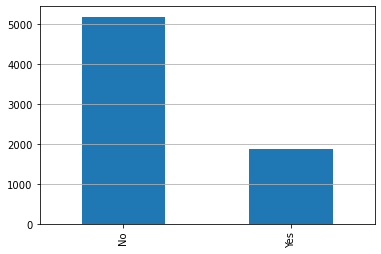

In [139]:
df['Churn'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [140]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [141]:
# Видим, что отток пользователей 26.5%

## gender

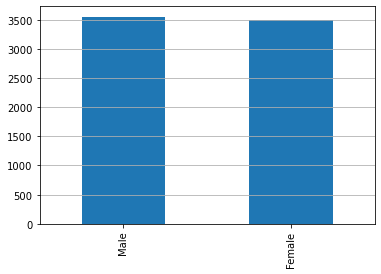

In [142]:
df['gender'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [143]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [144]:
df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

## SeniorCitizen

In [145]:
# Является ли арендатор пенсионером или нет

In [146]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

## Partner

In [147]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

## Dependents

In [148]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

## PhoneService

In [149]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

## MultipleLines 

In [150]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

## OnlineSecurity

In [151]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

## OnlineBackup

In [152]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

## DeviceProtection

In [153]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

## TechSupport

In [154]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

## InternetService

In [155]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

## StreamingTV

In [156]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

## StreamingMovies

In [157]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

## Contract

In [158]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

## PaperlessBilling

In [159]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

## PaymentMethod

In [160]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [161]:
# У нас всего 3 колонки с числовыми данными,рассмотрим их 

## tenure

In [162]:
# Количество месяцев пребывания клиента в компании

In [163]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

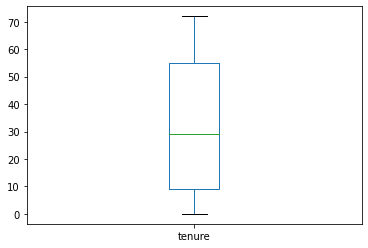

In [164]:
df['tenure'].plot.box()

In [165]:
# Выбросов нет

## MonthlyCharges

In [166]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

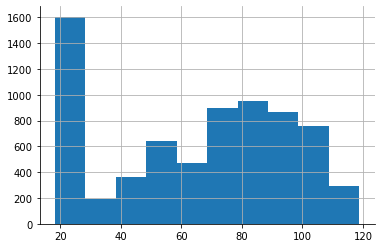

In [167]:
df['MonthlyCharges'].hist()
sns.despine()
plt.show()

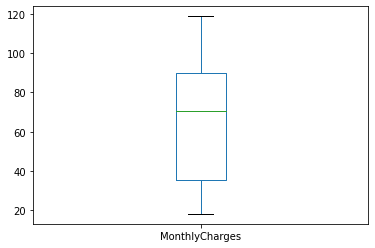

In [168]:
df['MonthlyCharges'].plot.box()

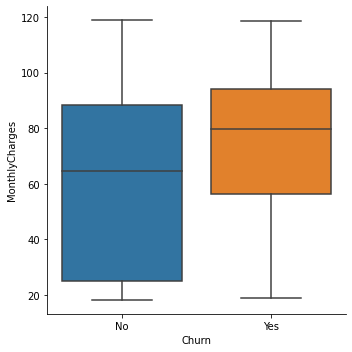

In [169]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = df, kind="box")

In [170]:
# Выбросов также нет

## TotalCharges

In [171]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
5886.85     1
1767.35     1
3145.15     1
4451.85     1
315.3       1
Name: TotalCharges, Length: 6531, dtype: int64

In [172]:
# Видим пропущенные значения, их всего 1.5% . Удалим их

In [173]:
df = df[df['TotalCharges'] != ' ']


In [174]:
# Перевожу значения 'TotalCharges' в числовые т.к. в них содержались ' '

In [175]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [176]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

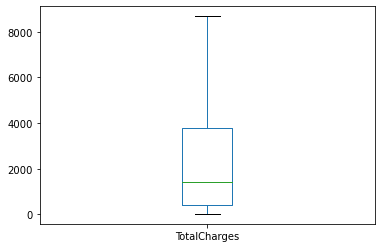

In [177]:
df['TotalCharges'].plot.box()

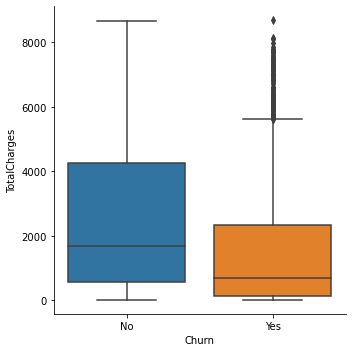

In [178]:
g = sns.factorplot(x="Churn", y = "TotalCharges",data = df, kind="box")

In [179]:
# Проверим на выбросы

In [180]:
def outlier_detect_IQR(data, col, threshold=3):   
    
    IQR = df[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    params = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    ovc = outlier_index.value_counts()
    if len(ovc) == 1:
        print('Выбросов нет')
    else:
        outlier_count = outlier_index.value_counts()[1]
        print('Количество выбросов в данных:', outlier_count)
        print('Доля выбросов:', f'{(100 * outlier_count / len(outlier_index)):.2f}%')
        print('Верхняя граница:', Upper_fence, '\nНижняя граница:', Lower_fence)
    return outlier_index, params

In [181]:
index, params = outlier_detect_IQR(data=df, col='TotalCharges', threshold=3)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Выбросов нет
Верхняя граница: 13974.600000000002 
Нижняя граница: -9778.4125


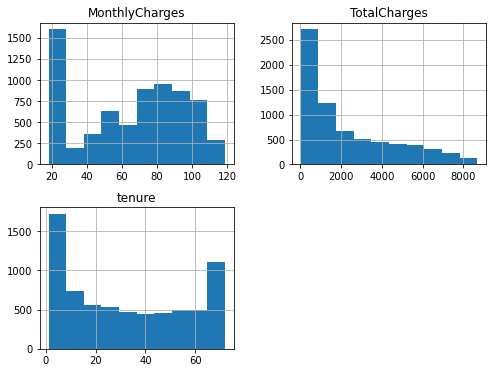

In [182]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].hist(figsize=(8, 6));

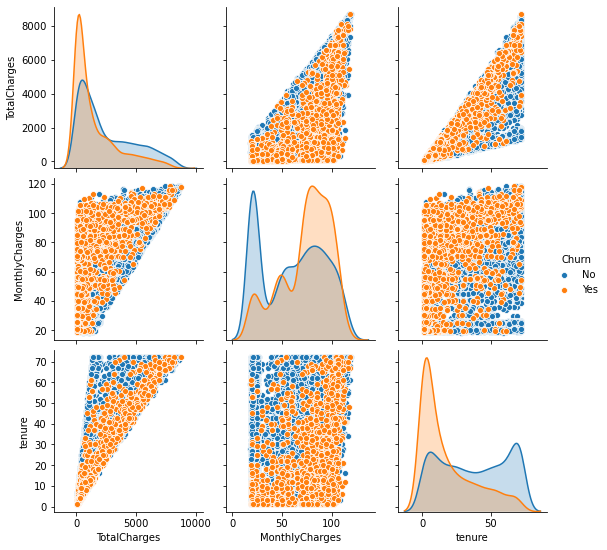

In [183]:
sns.pairplot(df[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']], hue='Churn');

## Корреляция

In [184]:
corr = df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()

In [185]:
mask = np.triu(np.ones_like(corr, dtype=bool))

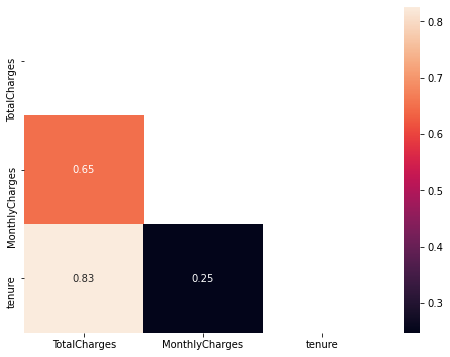

In [186]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

In [187]:
# Есть сильная корреляция и нет выбросов,уже неплохо. 

In [188]:
df2 = df

In [189]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Кодирую категориальные данные

In [190]:
df2 = pd.get_dummies(data=df2, columns=['gender'])

In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
le = LabelEncoder()

In [193]:
df2['Churn'] = le.fit_transform(df2['Churn'])

In [194]:
df2['Partner'] = le.fit_transform(df2['Partner'])
                                

In [195]:
df2['Dependents'] = le.fit_transform(df2['Dependents'])
                                

In [196]:
df2['PaperlessBilling'] = le.fit_transform(df2['PaperlessBilling'])
                                

In [197]:
df2['PhoneService'] = le.fit_transform(df2['PhoneService'])
                                

In [198]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [199]:
# Здесь 3 значения,но уже есть значение No phone service в колонке PhoneService
# поэтому эти значения переведём в No

In [200]:
df2['MultipleLines'].replace('No phone service','No', inplace=True)
df2['MultipleLines'] = le.fit_transform(df2['MultipleLines'])
df2['MultipleLines'].value_counts()

0    4065
1    2967
Name: MultipleLines, dtype: int64

In [201]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [202]:
# Создам отдельную колонку- есть интернет или нет

In [203]:
df2['Has_InternetService'] = df2['InternetService'].map(lambda s :0  if s =='No' else 1)
df2['Fiber_optic'] = df2['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df2['DSL'] = df2['InternetService'].map(lambda s :1  if s =='DSL' else 0)
df2.drop(['InternetService'], axis=1, inplace=True)

In [204]:
df2['Has_InternetService'].value_counts()

1    5512
0    1520
Name: Has_InternetService, dtype: int64

In [205]:
df2['Fiber_optic'].value_counts()

0    3936
1    3096
Name: Fiber_optic, dtype: int64

In [206]:
df2['DSL'].value_counts()

0    4616
1    2416
Name: DSL, dtype: int64

In [207]:
# Со следующими колонками проделаем то же,т.к.они имеют такой же формат

In [208]:
df2['OnlineSecurity'] = df2['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)

In [209]:
df2['OnlineBackup'] = df2['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)

In [210]:
df2['DeviceProtection'] = df2['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)

In [211]:
df2['TechSupport'] = df2['TechSupport'].map(lambda s :1  if s =='Yes' else 0)

In [212]:
df2['StreamingTV'] = df2['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)

In [213]:
df2['StreamingMovies'] = df2['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [214]:
# К остальным колонкам применим get_dummies

In [215]:
df2 = pd.get_dummies(data=df2, columns=['PaymentMethod'])

In [216]:
df2 = pd.get_dummies(data=df2, columns=['Contract'])

In [217]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Has_InternetService,Fiber_optic,DSL,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,0,0,0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,1,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0


## ML-задача классификации

In [218]:
# Разбиваем dataframe на train-test

In [219]:
X = df2.drop(['Churn'], axis=1)
y = df2['Churn']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

In [221]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((4922, 27), (2110, 27), (4922,), (2110,))

In [222]:
# Проведём несколько вариантов бустинга 

### sklearn

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score


est = GradientBoostingClassifier(n_estimators=100, max_depth=3,)
est.fit(X_train, y_train)
  
y_pred = est.predict(X_test)
  

In [224]:
print("Test quality:")
quality_report(est.predict(X_test), y_test)

Test quality:
Accuracy: 0.793
Precision: 0.501
Recall: 0.642
f1_score: 0.563


### Получил Accuracy: 79.29%. Проверю на XGBoost

## XGBoost

In [225]:
import xgboost 

In [226]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [227]:
y_pred = xgb.predict(X_test)
 

In [228]:
print("Test quality:")
quality_report(xgb.predict(X_test), y_test)

Test quality:
Accuracy: 0.779
Precision: 0.501
Recall: 0.602
f1_score: 0.547


### Получил Accuracy = 77.9%, пока так себе результат.Посмотрим другие алгоритмы     

## Catboost

In [229]:
from catboost import CatBoostClassifier

In [230]:
params = {'verbose': 200, }

cb = CatBoostClassifier(**params)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)



Learning rate set to 0.020346
0:	learn: 0.6787752	total: 11.2ms	remaining: 11.2s
200:	learn: 0.3781619	total: 1.9s	remaining: 7.55s
400:	learn: 0.3504429	total: 3.99s	remaining: 5.95s
600:	learn: 0.3269471	total: 5.93s	remaining: 3.94s
800:	learn: 0.3054440	total: 7.92s	remaining: 1.97s
999:	learn: 0.2865514	total: 10s	remaining: 0us


In [231]:
print("Test quality:")
quality_report(cb.predict(X_test), y_test)

Test quality:
Accuracy: 0.790
Precision: 0.501
Recall: 0.633
f1_score: 0.559


### Accuracy=79% . Проверю на LightGBM

## LightGBM

In [232]:
import lightgbm as lgb

In [233]:
from lightgbm import LGBMClassifier

In [234]:
lb = LGBMClassifier()

In [235]:
lb.fit(X_train, y_train)
y_pred = lb.predict(X_test)

In [236]:
print("Test quality:")
quality_report(lb.predict(X_test), y_test)

Test quality:
Accuracy: 0.788
Precision: 0.508
Recall: 0.625
f1_score: 0.560


### Здесь Accuracy = 78.8%. 

## Настроим гиперпараметры на RandomizedSearchCV

In [237]:
from sklearn.model_selection import RandomizedSearchCV

### sklearn

In [238]:

est = GradientBoostingClassifier()

params = {
    "max_depth":[3,5,8,10],
    "max_features":["auto","log2","sqrt"],    
    "subsample":[0.2, 0.4, 0.6, 0.8, 1.0],
    "n_estimators":[100,150,200]
    }



rs = RandomizedSearchCV(est,cv=5, verbose=1, param_distributions = params,)
rs.fit(X_train, y_train)

y_pred = rs.predict(X_test)


print("Test quality:")
quality_report(rs.predict(X_test), y_test)


 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


Test quality:
Accuracy: 0.776
Precision: 0.494
Recall: 0.596
f1_score: 0.540


In [268]:
rs.best_params_

{'subsample': 0.6, 'n_estimators': 150, 'max_features': 'log2', 'max_depth': 8}

## Сделаем то же на GridSearchCV

In [240]:
from sklearn.model_selection import GridSearchCV

In [267]:
params = {
    "max_depth":[3,5,8,10],
    "max_features":["auto","log2","sqrt"],    
    "subsample":[0.2, 0.4, 0.6, 0.8, 1.0],
    "n_estimators":[100,150,200]
    }



grid = GridSearchCV(est,cv=5, verbose=1, param_grid = params,)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Test quality:")
quality_report(grid.predict(X_test), y_test)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 29.3min finished


Test quality:
Accuracy: 0.803
Precision: 0.519
Recall: 0.667
f1_score: 0.584


In [242]:
grid.best_params_

###  RandomizedSearchCV чуть лучше работает,на остальных алгоритмах буду использовать его

## XGBoost

In [243]:
# Методом тыка получилось следующее

In [244]:
params = {'nthread':[2,4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth': [4,6,8],
              'min_child_weight': [9,10,11],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.5,0.7,0.9],
              'n_estimators': [3,5,7]}

grid2 = RandomizedSearchCV(xgb,param_distributions=params, cv=5, verbose=1,)
grid2.fit(X_train, y_train)

y_pred = grid2.predict(X_test)

print("Test quality:")
quality_report(grid2.predict(X_test), y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test quality:
Accuracy: 0.798
Precision: 0.478
Recall: 0.667
f1_score: 0.557


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [245]:
grid2.best_params_

{'subsample': 0.8,
 'objective': 'binary:logistic',
 'nthread': 4,
 'n_estimators': 7,
 'min_child_weight': 9,
 'max_depth': 6,
 'learning_rate': 0.2,
 'colsample_bytree': 0.5}

In [ ]:
# Из "коробки"
# Test quality:
# Accuracy: 0.779
# Precision: 0.501
# Recall: 0.602
# f1_score: 0.547

In [246]:
# Лучше,чем из "коробки",но не намного

## Catboost

In [260]:

params = {'depth': [6,8,10],
          'l2_leaf_reg': [9],
          'learning_rate' : [0.01, 0.05, 0.1],
          'leaf_estimation_iterations': [10],
         }


cb2 = RandomizedSearchCV(cb, param_distributions=params,cv=5)
cb2.fit(X_train, y_train)

y_pred = cb2.predict(X_test)

print("Test quality:")
quality_report(cb2.predict(X_test), y_test)



0:	learn: 0.6861210	total: 12.9ms	remaining: 12.9s
200:	learn: 0.3989391	total: 1.81s	remaining: 7.19s
400:	learn: 0.3746325	total: 3.26s	remaining: 4.88s
600:	learn: 0.3596342	total: 4.7s	remaining: 3.12s
800:	learn: 0.3470335	total: 6.14s	remaining: 1.53s
999:	learn: 0.3348074	total: 7.6s	remaining: 0us
0:	learn: 0.6861081	total: 7.78ms	remaining: 7.78s
200:	learn: 0.4040583	total: 1.44s	remaining: 5.71s
400:	learn: 0.3794692	total: 2.88s	remaining: 4.31s
600:	learn: 0.3644501	total: 4.57s	remaining: 3.04s
800:	learn: 0.3513463	total: 6.04s	remaining: 1.5s
999:	learn: 0.3403988	total: 7.49s	remaining: 0us
0:	learn: 0.6863442	total: 23.6ms	remaining: 23.6s
200:	learn: 0.4083760	total: 1.49s	remaining: 5.93s
400:	learn: 0.3833503	total: 2.88s	remaining: 4.3s
600:	learn: 0.3673157	total: 4.33s	remaining: 2.88s
800:	learn: 0.3532920	total: 5.8s	remaining: 1.44s
999:	learn: 0.3417030	total: 7.43s	remaining: 0us
0:	learn: 0.6862892	total: 18.5ms	remaining: 18.4s
200:	learn: 0.4011135	total

In [261]:
 cb2.best_params_

{'learning_rate': 0.01,
 'leaf_estimation_iterations': 10,
 'l2_leaf_reg': 9,
 'depth': 6}

In [ ]:
# Результаты из "коробки"
# Test quality:
# Accuracy: 0.790
# Precision: 0.501
# Recall: 0.633
# f1_score: 0.559

## LightGBM

In [265]:
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [90,200],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
     }
lb2 = RandomizedSearchCV(lb,params,verbose=1,cv=5,n_iter=10)

lb2.fit(X_train, y_train)
y_pred = lb2.predict(X_test)

print("Test quality:")
quality_report(lb2.predict(X_test), y_test)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test quality:
Accuracy: 0.795
Precision: 0.513
Recall: 0.644
f1_score: 0.571


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.3s finished


In [266]:
 lb2.best_params_

{'subsample': 0.7,
 'random_state': 501,
 'num_leaves': 200,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'max_depth': 6,
 'learning_rate': 0.05,
 'colsample_bytree': 0.5}

In [ ]:
# Из "коробки"
# Test quality:
# Accuracy: 0.788
# Precision: 0.508
# Recall: 0.625
# f1_score: 0.560

## Выводы:

### Настройки из "коробки" на всех алгоритмах работают очень хорошо,и не всегда имеет смысл тратить время на доп.настройки
### Все алгоритмы отработали примерно на одинаковые результаты. Критических отличий нет.
### Думаю,что на разных датафреймах они работают по-разному